In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math
from datetime import datetime as dt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [2]:
#importation des données
ventes = pd.read_csv('ventesOk.csv')
clients = pd.read_csv('clientsOk.csv')
produits = pd.read_csv('produitsOk.csv')
ventes = ventes.astype({'dates':'datetime64[ns]'})

# Clients 

#### Univarié

In [3]:
#création d'une colonne âge (par rapport à la dernière vente)
clients["age"] = ventes['dates'].dt.year.max()-clients['birth'] 

In [4]:
#création d'une fonction créant les catégories d'âges 
def classeAge(age):
    if age < 20:
        val = '20 et moins'
    elif  20 <= age <=29:
        val = '20-29'
    elif 30 <= age <=39:
        val = '30-39'
    elif 40 <= age <=49:
        val = '40-49'
    elif 50 <= age <=59:
        val = '50-59'
    elif 60 <= age <=69:
        val = '60-69'
    elif 70 <= age <=79:
        val = '70-79' 
    elif 80<= age :
        val = '80 et plus'
    return val

In [5]:
#Application de la fonction  
clients["classe_age"]= clients['age'].apply(classeAge)
clients

,client_id,sex,birth,age,classe_age
0,c_4410,f,1967,55,50-59
1,c_7839,f,1975,47,40-49
2,c_1699,f,1984,38,30-39
3,c_5961,f,1962,60,60-69
4,c_5320,m,1943,79,70-79
...,...,...,...,...,...
8618,c_7920,m,1956,66,60-69
8619,c_7403,f,1970,52,50-59
8620,c_5119,m,1974,48,40-49
8621,c_5643,f,1968,54,50-59


In [6]:
# sex tableau de représentation
clientSex = clients.groupby('sex').count()
clientSex = clientSex[["client_id"]]
clientSex.columns = ['effectif']
clientSex['frequence'] = clientSex.effectif/len(clients)
clientSex

,effectif,frequence
sex,,
f,4491,0.520816
m,4132,0.479184


In [7]:
# birth tableau représentation 
clientAge = clients.groupby("birth").count()
clientAge = clientAge[['client_id']]
clientAge.columns = ['effectif']
clientAge['frequence'] = clientAge.effectif/len(clients)
clientAge['fq_cumul'] = clientAge["frequence"].cumsum()
clientAge

,effectif,frequence,fq_cumul
birth,,,
1929,3,0.000348,0.000348
1930,4,0.000464,0.000812
1931,4,0.000464,0.001276
1932,6,0.000696,0.001971
1933,8,0.000928,0.002899
...,...,...,...
2000,136,0.015772,0.900151
2001,129,0.014960,0.915111
2002,146,0.016931,0.932042


Text(0.5, 1.0, 'Répartition des clients par date de naissance')

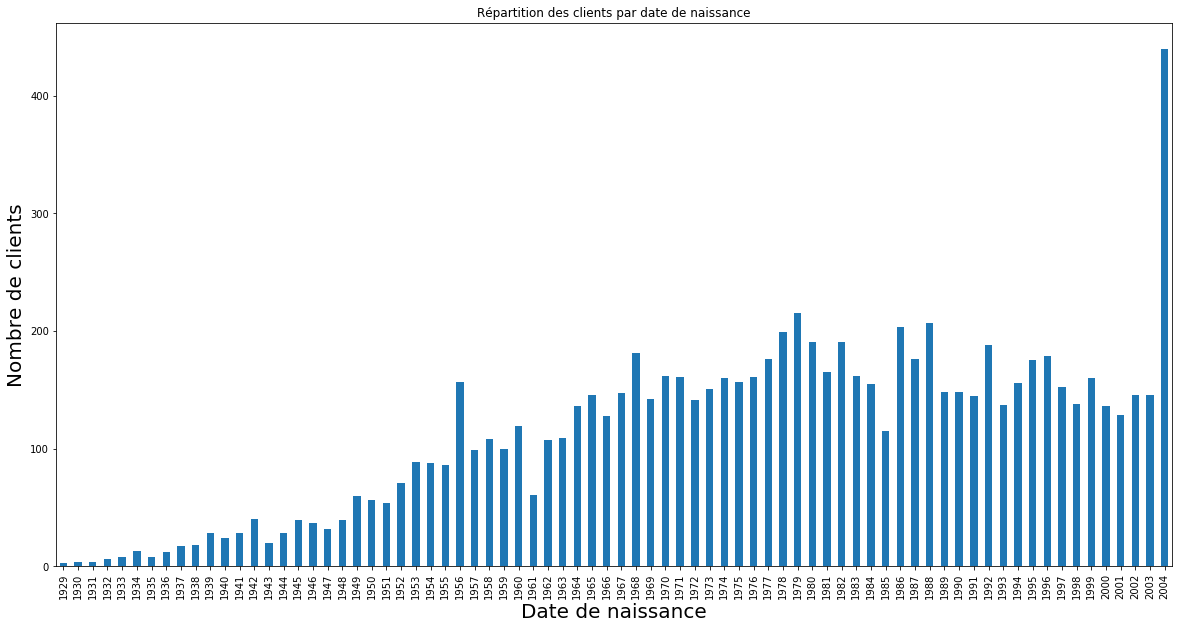

In [8]:
#répartition en fonction de l'année de naissance (beaucoup en 2004: mineurs)
clientAge["effectif"].plot(kind = 'bar',figsize=(20,10))
plt.xlabel('Date de naissance', fontsize=20)
plt.ylabel('Nombre de clients', fontsize=20)
plt.title("Répartition des clients par date de naissance")

In [9]:
#age tendance centrales
print(clients['birth'].mean())
print(clients['birth'].mode())
print(clients['birth'].median())
print(clients['age'].mean())


1978.2808767250376
0    2004
dtype: int64
1979.0
43.71912327496231


In [10]:
# classe d'âge tableau représentation 
clientClasseAge = clients.groupby(["classe_age",'sex']).count()
clientClasseAge = clientClasseAge[['client_id']]
clientClasseAge.columns = ['effectif']
clientClasseAge['frequence'] = clientClasseAge.effectif/len(clients)
clientClasseAge['fq_cumul'] = clientClasseAge["frequence"].cumsum()
clientClasseAge

effectif  frequence  fq_cumul
classe_age  sex                               
20 et moins f         297   0.034443  0.034443
            m         289   0.033515  0.067958
20-29       f         776   0.089992  0.157950
            m         732   0.084889  0.242839
30-39       f         845   0.097994  0.340833
            m         802   0.093007  0.433840
40-49       f         930   0.107851  0.541691
            m         836   0.096950  0.638641
50-59       f         752   0.087209  0.725849
            m         701   0.081294  0.807144
60-69       f         519   0.060188  0.867332
            m         495   0.057405  0.924736
70-79       f         245   0.028412  0.953149
            m         191   0.022150  0.975299
80 et plus  f         127   0.014728  0.990027
            m          86   0.009973  1.000000

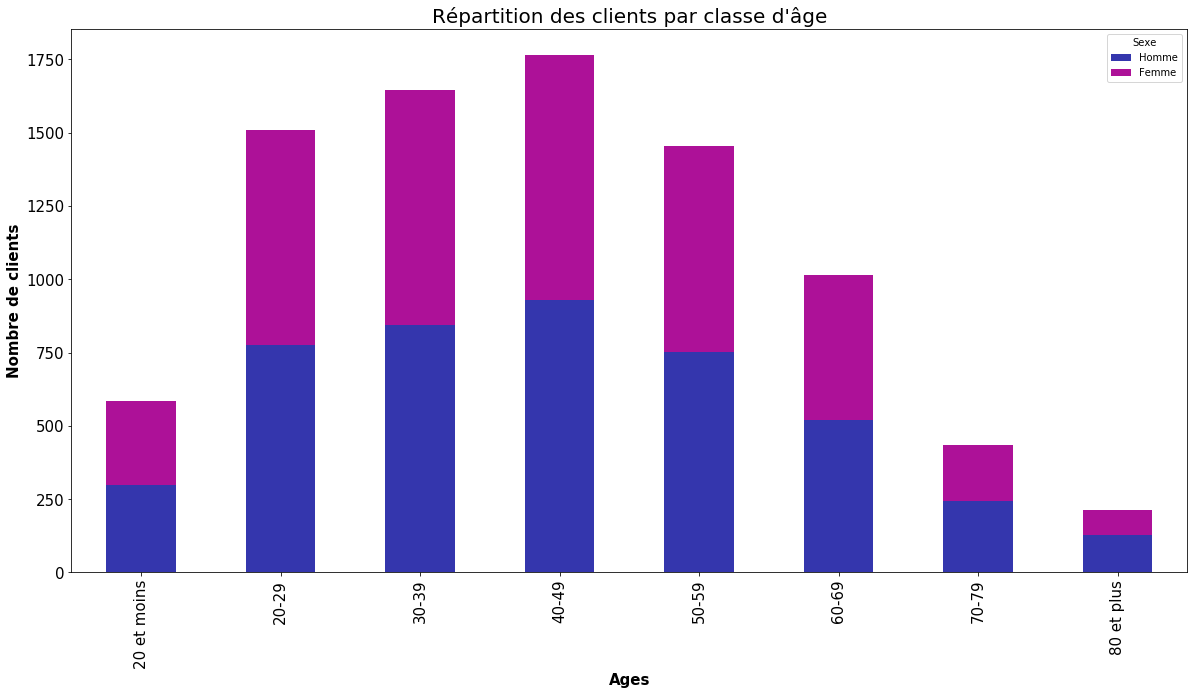

In [83]:
graphClientClasseAge = clientClasseAge.pivot_table(index = 'classe_age', columns ='sex')
graphClientClasseAge['effectif'].plot(kind = 'bar' ,stacked =True, figsize = (20,10),color = ['#3436AD',"#AD1198"])
axes = plt.gca()
plt.xlabel('Ages', fontsize=15, fontweight ="heavy" )
plt.ylabel('Nombre de clients', fontsize=15,fontweight ="heavy" )
plt.title("Répartition des clients par classe d'âge", fontsize = 20)
axes.yaxis.set_tick_params (labelsize =15)
axes.xaxis.set_tick_params (labelsize =15)
plt.legend (["Homme","Femme"],title= "Sexe")

### Produits

In [12]:
produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [13]:
# categ tableau de représentation
produitsCateg = produits.groupby('categ').count()
produitsCateg = produitsCateg[["price"]]
produitsCateg.columns = ['effectif']
produitsCateg['frequence'] = produitsCateg.effectif/len(produits)
produitsCateg

,effectif,frequence
categ,,
0,2310,0.702555
1,739,0.224757
2,239,0.072689


In [14]:
# prix tendance centrale
print(produits['price'].mean())
print(produits['price'].mode())
print(produits['price'].median())

21.853560608335677
0    4.99
dtype: float64
13.055


--------------------
0
moy:
 11.72728020788248
med:
 10.32
var:
 57.23646282238245
std:
 7.56547836044638
skw:
 0.837664674212988
kur:
 0.3330790524996483


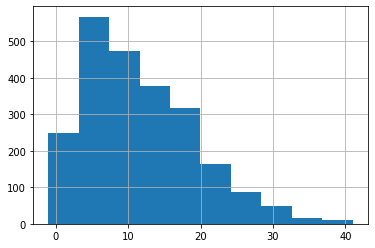

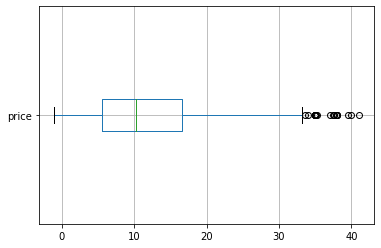

--------------------
1
moy:
 25.531420838971624
med:
 22.99
var:
 237.61364304211
std:
 15.414721633623813
skw:
 0.8120109621070365
kur:
 0.2993533794236898


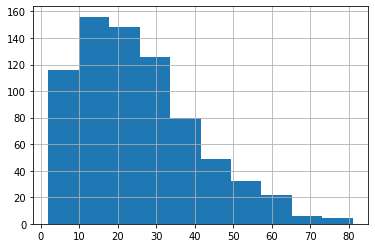

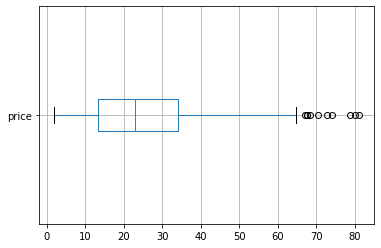

--------------------
2
moy:
 108.35468619246883
med:
 101.99
var:
 2446.0578977048704
std:
 49.45763740520639
skw:
 0.9310209579538592
kur:
 0.808968484300689


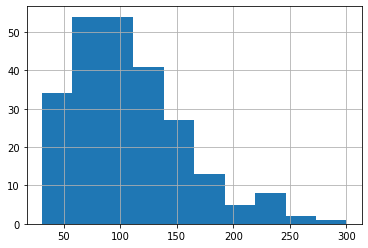

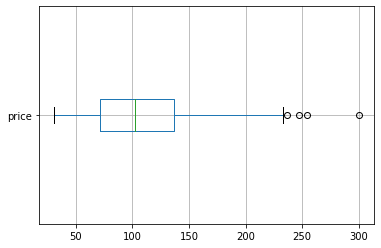

In [15]:
# analyse par catégorie 
for cat in produits["categ"].unique():
    sous_echantillon = produits[produits.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",sous_echantillon['price'].mean())
    print("med:\n",sous_echantillon['price'].median())
    print("var:\n",sous_echantillon['price'].var(ddof=0))
    print("std:\n",sous_echantillon['price'].std(ddof=0))
    print("skw:\n",sous_echantillon['price'].skew())
    print("kur:\n",sous_echantillon['price'].kurtosis())
    sous_echantillon["price"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme
    sous_echantillon.boxplot(column="price", vert=False)
    plt.show()

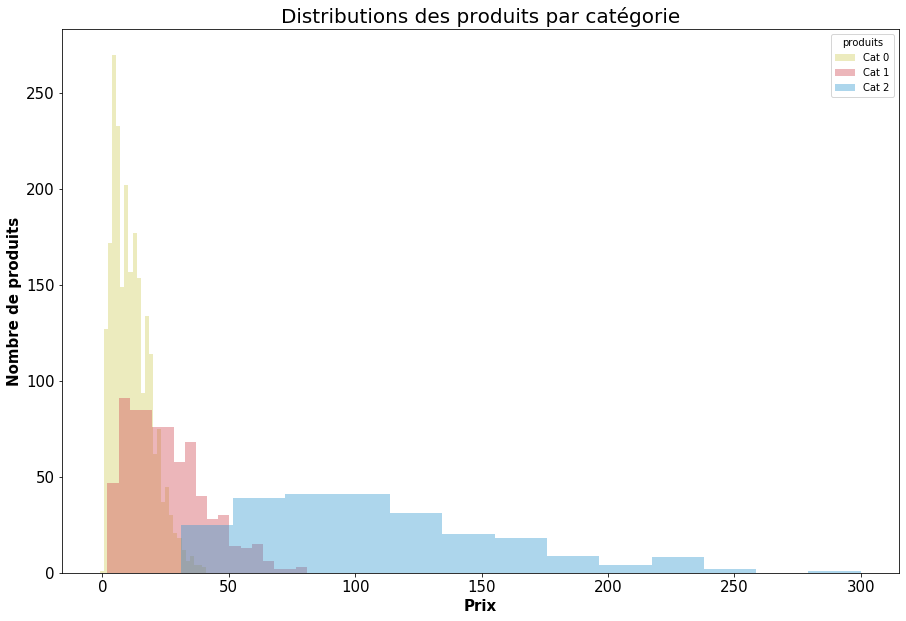

In [85]:
#Distribution des produits 
plt.figure(figsize = (15,10))
axes = plt.gca()
sns.distplot( produits[produits["categ"]== 0]['price'] , color="#D1CE5E", label="Cat 0",hist=True, kde=False, rug=False )
sns.distplot( produits[produits["categ"]== 1]['price'] , color="#D14A53", label="Cat 1",hist=True, kde=False, rug=False)
sns.distplot( produits[produits["categ"]== 2]['price'] , color="#349AD1", label="Cat 2",hist=True, kde=False, rug=False)
plt.legend(title = "produits")
plt.xlabel('Prix', fontsize=15, fontweight='heavy')
plt.ylabel('Nombre de produits', fontsize=15, fontweight='heavy')
axes.yaxis.set_tick_params (labelsize =15)
axes.xaxis.set_tick_params (labelsize =15)
plt.title("Distributions des produits par catégorie", fontsize = 20)
plt.show()

# Ventes
- nb d'achats (visites, un ou plusieurs porudits)
    - mois
    - clients 
    
- concentration achats clients 
    

In [17]:
ventes.describe()

,id_prod,dates,session_id,client_id
count,336816,336816,336816,336816
unique,3265,336816,169194,8600
top,1_369,2021-06-30 11:35:55.387896,s_118668,c_1609
freq,1081,1,14,12855
first,NaN,2021-03-01 00:01:07.843138,NaN,NaN
last,NaN,2022-02-28 23:59:58.040472,NaN,NaN


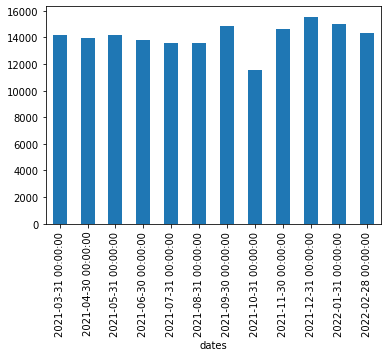

In [18]:
#nb visites par mois 
visites = ventes.drop_duplicates("session_id")
visitesMois = visites.groupby(pd.Grouper(key = 'dates', freq = 'M')).count()
visitesMois['session_id'].plot(kind = 'bar')

In [19]:
#nb visites par clients 
visitesClients = visites.groupby('client_id').count()
visitesClients = visitesClients.sort_values('id_prod')
visitesClients

,id_prod,dates,session_id
client_id,,,
c_4540,1,1,1
c_2269,1,1,1
c_6247,1,1,1
c_6286,1,1,1
c_2896,1,1,1
...,...,...,...
c_682,84,84,84
c_6714,1286,1286,1286
c_4958,1888,1888,1888


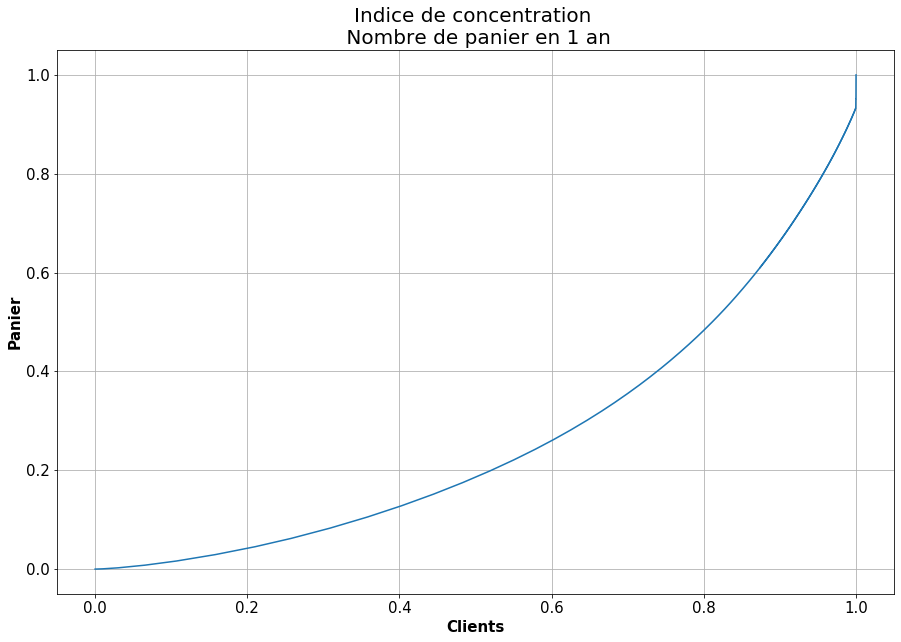

In [86]:
#fréquence transactions clients (concentration lorenz)
nbVisiste = visitesClients['id_prod'].values
lorenzVi = np.cumsum(np.sort(nbVisiste)) / nbVisiste.sum()
lorenzVi = np.append([0],lorenzVi) # La courbe de Lorenz commence à 0

plt.figure(figsize =(15,10))
axes = plt.gca()
plt.plot(np.linspace(0,1,len(lorenzVi)),lorenzVi,drawstyle='steps-post')
plt.grid()
plt.xlabel("Clients", fontsize=15, fontweight = 'heavy')
plt.ylabel("Panier", fontsize=15, fontweight = 'heavy')
axes.yaxis.set_tick_params (labelsize =15)
axes.xaxis.set_tick_params (labelsize =15)
plt.title("Indice de concentration \n Nombre de panier en 1 an", fontsize = 20)

plt.show()


In [21]:
# gini nb panier par client
aire_ss_courbeVi = lorenzVi[:-1].sum()/len(lorenzVi) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbeVi # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.470019568502159

In [22]:
#moyenne écartype et variance avec gros clients 
visitesClientsB = visitesClients[['id_prod']]
visitesClientsB.columns =["nb_panier"]
print ('moy:', visitesClientsB.mean())
print ('var:', visitesClientsB.var(ddof=0))
print ('ET:', visitesClientsB.std(ddof=0))

moy: nb_panier    19.673721
dtype: float64
var: nb_panier    5160.592379
dtype: float64
ET: nb_panier    71.837263
dtype: float64


In [23]:
visitesClientsB.nlargest(6, 'nb_panier')

,nb_panier
client_id,
c_1609,5501
c_3454,2711
c_4958,1888
c_6714,1286
c_682,84
c_8392,79


In [24]:
#moyenne écartype et variance sans gros clients 
visitesClientsC = visitesClientsB[visitesClientsB['nb_panier']<=1000]
print ('moy:', visitesClientsC.mean())
print ('var:', visitesClientsC.var(ddof=0))
print ('ET:', visitesClientsC.std(ddof=0))

moy: nb_panier    18.358306
dtype: float64
var: nb_panier    230.784134
dtype: float64
ET: nb_panier    15.191581
dtype: float64


# Corrélations 

In [25]:
#jointure naturelle des datas 
ventesClients = pd.merge(ventes,clients, on = "client_id")
ventesClientsProduits = pd.merge (ventesClients, produits, on ='id_prod')
ventesClientsProduits.sort_values("dates")

,id_prod,dates,session_id,client_id,sex,birth,age,classe_age,price,categ
240516,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,55,50-59,11.99,0
236766,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,62,60-69,19.37,0
167448,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,34,30-39,4.50,0
43483,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,33,30-39,6.55,0
112567,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,66,60-69,16.49,0
...,...,...,...,...,...,...,...,...,...,...
128549,1_456,2022-02-28 23:56:57.196281,s_172422,c_5787,f,1986,36,30-39,28.27,1
40387,1_370,2022-02-28 23:56:57.561424,s_172423,c_1460,m,1989,33,30-39,13.11,1
190947,0_1538,2022-02-28 23:57:12.741573,s_172424,c_1876,m,1983,39,30-39,8.61,0
224768,0_1403,2022-02-28 23:59:02.381670,s_172423,c_1460,m,1989,33,30-39,15.99,0


### Correléation sexe et catégorie achetée

In [26]:
sexeCateg = ventesClientsProduits[['sex','categ']]

In [27]:
# Tableau de contingence (2 variables quali)
X = "categ"
Y = "sex"
c = sexeCateg[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = sexeCateg[X].value_counts()
ty = sexeCateg[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(sexeCateg)
cont

sex,f,m,Total
categ,,,
0,103846.0,105683.0,209529.0
1,55469.0,54266.0,109735.0
2,8260.0,9292.0,17552.0
total,167575.0,169241.0,336816.0


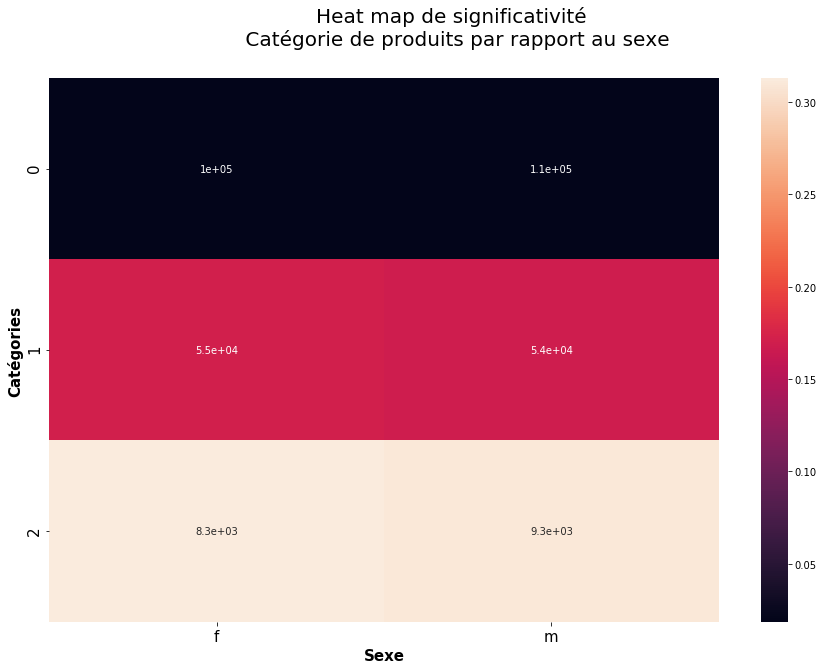

In [92]:
# Tableau de contingence (2 variables quali)
plt.figure (figsize =(15,10))
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(sexeCateg)
indep = tx.dot(ty.T) / n

c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n,annot=c)

axes = plt.gca()
plt.xlabel('Sexe', fontsize= 15, fontweight = 'heavy')
plt.ylabel('Catégories', fontsize=15, fontweight = 'heavy')
axes.yaxis.set_tick_params (labelsize =15)
axes.xaxis.set_tick_params (labelsize =15)
plt.suptitle("Heat map de significativité \n Catégorie de produits par rapport au sexe",ha = 'center',fontsize = 20) 
plt.show()

# corrélations ages
- montant des achats (2 quanti)
- fréquence des achats (2 quanti)
- Taille du panier (2 quanti)
- catégorie acheté (1 quanti 1 quali)

In [29]:
ventes.sort_values("session_id")

,id_prod,dates,session_id,client_id
176486,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
309361,1_635,2021-03-01 00:10:33.163037,s_10,c_2218
42015,0_1451,2021-03-01 04:43:58.025677,s_100,c_3854
148829,0_1030,2021-03-01 04:12:43.572994,s_100,c_3854
328546,0_1590,2021-03-03 02:49:03.169115,s_1000,c_1014
...,...,...,...,...
195716,0_1475,2021-10-04 18:45:05.640783,s_99996,c_4900
91053,0_1197,2021-10-04 18:45:38.003516,s_99997,c_3521
251734,0_1572,2021-10-04 18:45:54.374885,s_99998,c_2795
8124,0_1604,2021-10-04 19:00:20.030388,s_99998,c_2795


#### Corré ages montants des achats

In [30]:
#selection des colonnes 
agesMontant = ventesClientsProduits[['age','price','session_id']]

In [31]:
#agrégation pour avoir le montant du panier de chaque client 
agesMontantSum = agesMontant.groupby(['age','session_id']).sum()
agesMontantSum = agesMontantSum.reset_index()
agesMontantSum = agesMontantSum[["age","price"]]
agesMontantSum

,age,price
0,18,68.99
1,18,67.57
2,18,12.99
3,18,15.99
4,18,67.57
...,...,...
169189,93,13.11
169190,93,84.49
169191,93,7.99
169192,93,21.19


const    67.351215
age      -0.721282
dtype: float64


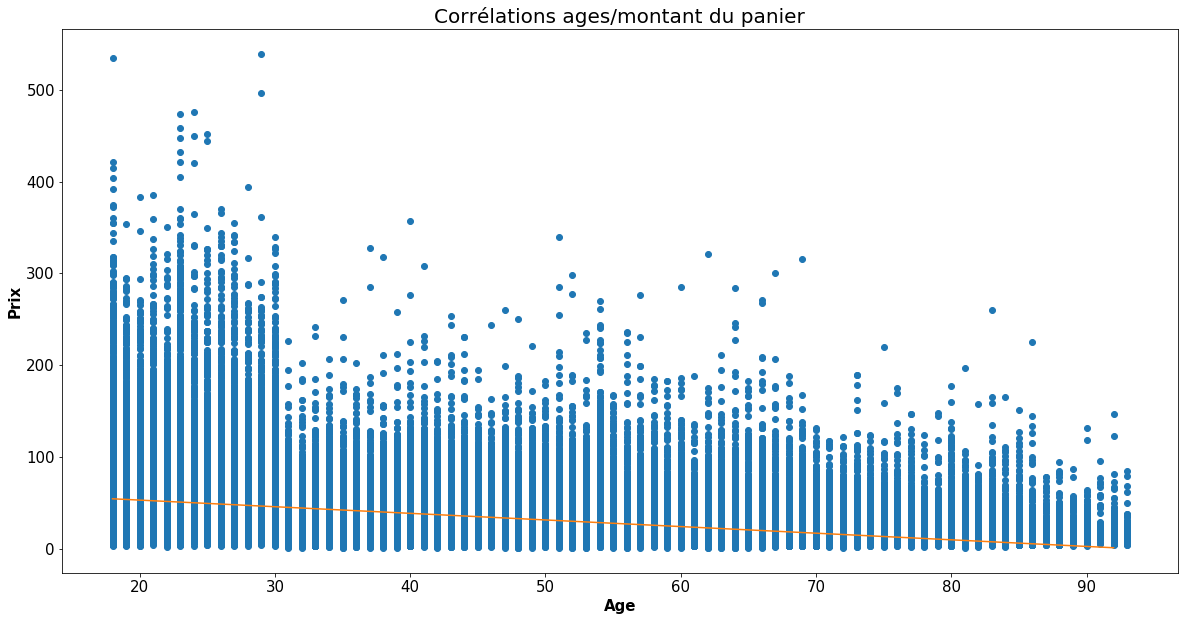

In [93]:
Yams = agesMontantSum['price']
Xams = agesMontantSum[['age']]
Xams = sm.add_constant(Xams)
moindreCareAms = sm.OLS(Yams, Xams).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = moindreCareAms.params['age'],moindreCareAms.params['const']

print(moindreCareAms.params)

fig = plt.figure(1, figsize=(20, 10))
axes = plt.gca()
plt.plot(agesMontantSum.age,agesMontantSum.price, "o")
plt.plot(np.arange(18,93),[a*x+b for x in np.arange(18,93)])
plt.title("Corrélations ages/montant du panier",fontsize = 20)
plt.xlabel("Age",fontsize = 15, fontweight= 'heavy')
plt.ylabel("Prix",fontsize = 15, fontweight= 'heavy')
axes.yaxis.set_tick_params (labelsize =15)
axes.xaxis.set_tick_params (labelsize =15)
plt.show()

Coefficients: 
 [[-0.72128226]]
Mean squared error: 900.70
Coefficient of determination: 0.11


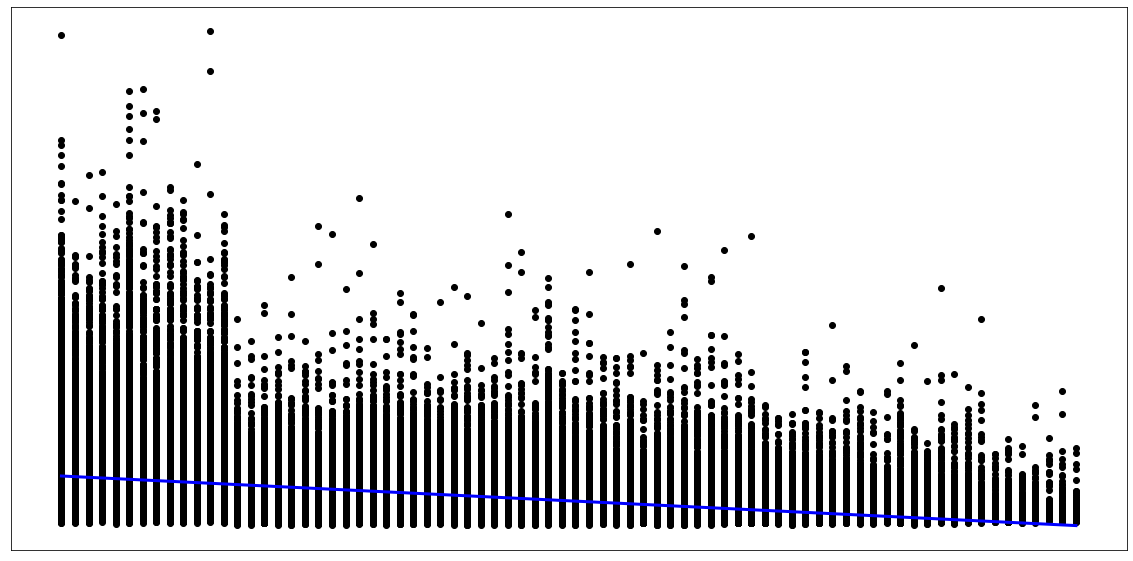

In [33]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(agesMontantSum[['age']], agesMontantSum[['price']])

# Make predictions using the testing set
agesMontantSumPricePred = regr.predict(agesMontantSum[['age']])

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(agesMontantSum[['price']], agesMontantSumPricePred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(agesMontantSum[['price']], agesMontantSumPricePred))

# Plot outputs
fig = plt.figure(1, figsize=(20, 10))
plt.scatter(agesMontantSum[['age']], agesMontantSum[['price']],  color='black')
plt.plot(agesMontantSum[['age']], agesMontantSumPricePred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [34]:
print(stats.pearsonr(agesMontantSum["age"],agesMontantSum["price"])[0])
print(np.cov(agesMontantSum["age"],agesMontantSum["price"],ddof=0)[1,0])

-0.3366687038272753
-159.63402267389694


#### Corré age/fréquence des achats

In [35]:
agesFq = ventesClientsProduits[["client_id","age","session_id","dates"]] #selection colonne 
agesFq = agesFq.drop_duplicates("session_id") #selection des visites
agesFq = agesFq.set_index('dates')
agesFq = agesFq.groupby([pd.Grouper(freq='M'),'client_id','age']).count() #nb visites par clients
agesFq = agesFq.reset_index()  #reset d'index pour l'agregation 
agesFq = agesFq.groupby("age").mean() #moyenne de visite par age 
agesFq = agesFq.reset_index() #reset pour utilisation corrélation
agesFq


,age,session_id
0,18,1.542035
1,19,1.537060
2,20,1.499412
3,21,1.549538
4,22,1.520619
...,...,...
71,89,2.226415
72,90,2.145833
73,91,1.633333
74,92,2.769231


const    2.290037
age      0.001425
dtype: float64


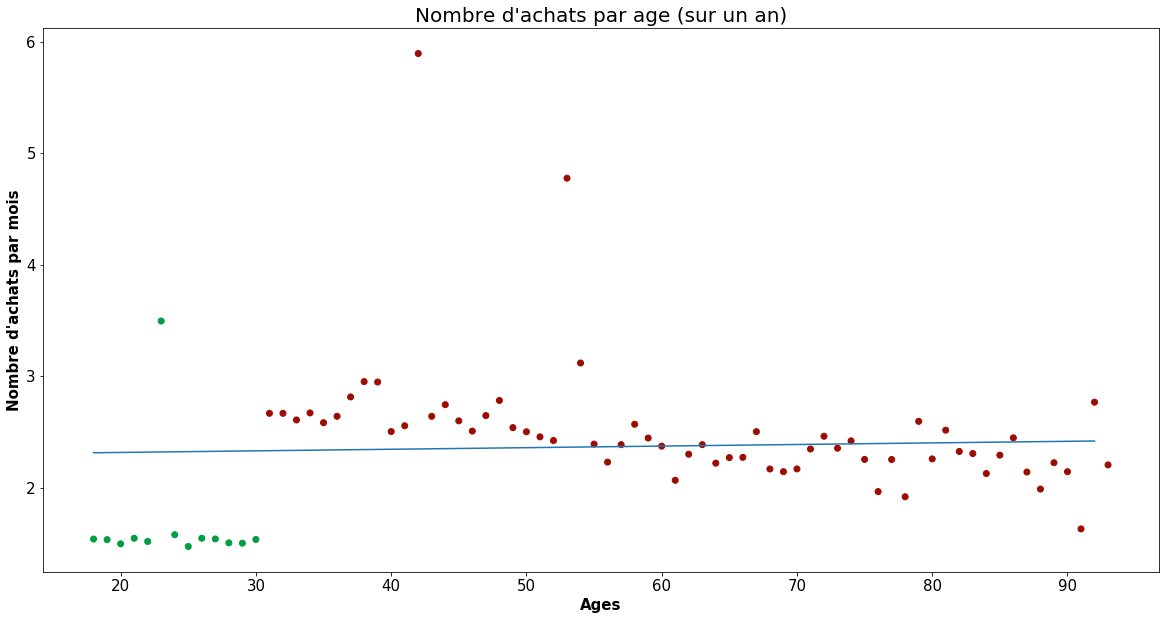

In [98]:
Yafq = agesFq['session_id']
Xafq = agesFq[['age']]
Xafq = sm.add_constant(Xafq)
moindreCareAfq = sm.OLS(Yafq, Xafq).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = moindreCareAfq.params['age'],moindreCareAfq.params['const']

print(moindreCareAfq.params)

fig = plt.figure(1, figsize=(20, 10))
def pltcolor(lst):
    cols=[]
    for i in lst:
        if i <= 30:
            cols.append("#009E42")
        elif i >= 31:
            cols.append("#9E0B00")
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(agesFq.age)

plt.scatter(agesFq['age'],agesFq["session_id"],c = cols, marker ="o")
axes = plt.gca()
plt.plot(np.arange(18,93),[a*x+b for x in np.arange(18,93)])
plt.xlabel("Ages",fontsize =15,fontweight = 'heavy')
plt.ylabel("Nombre d'achats par mois", fontsize= 15 ,fontweight = 'heavy' ) 
plt.title("Nombre d'achats par age (sur un an)", fontsize = 20)
axes.yaxis.set_tick_params (labelsize =15)
axes.xaxis.set_tick_params (labelsize =15)
plt.show()

In [37]:
print (agesFq[agesFq["age"]<=30].mean())
print (agesFq[agesFq["age"]>=30].mean())

age           24.000000
session_id     1.680506
dtype: float64
age           61.500000
session_id     2.496024
dtype: float64


#### Corré age/Taille du panier

In [38]:
agesTaillesPanier = ventesClientsProduits[['age','price','session_id']]
agesTaillesPanier = agesTaillesPanier.groupby(['age','session_id']).count()
agesTaillesPanier = agesTaillesPanier.reset_index()
agesTaillesPanier = agesTaillesPanier[["age","price"]]
agesTaillesPanier = agesTaillesPanier.groupby ("age").mean()
agesTaillesPanier.columns = ["taille_du_panier"]
agesTaillesPanier = agesTaillesPanier.reset_index()
agesTaillesPanier

,age,taille_du_panier
0,18,1.757054
1,19,1.724901
2,20,1.742947
3,21,1.732310
4,22,1.843220
...,...,...
71,89,1.389831
72,90,1.543689
73,91,1.714286
74,92,1.597222


const    2.371667
age     -0.010954
dtype: float64


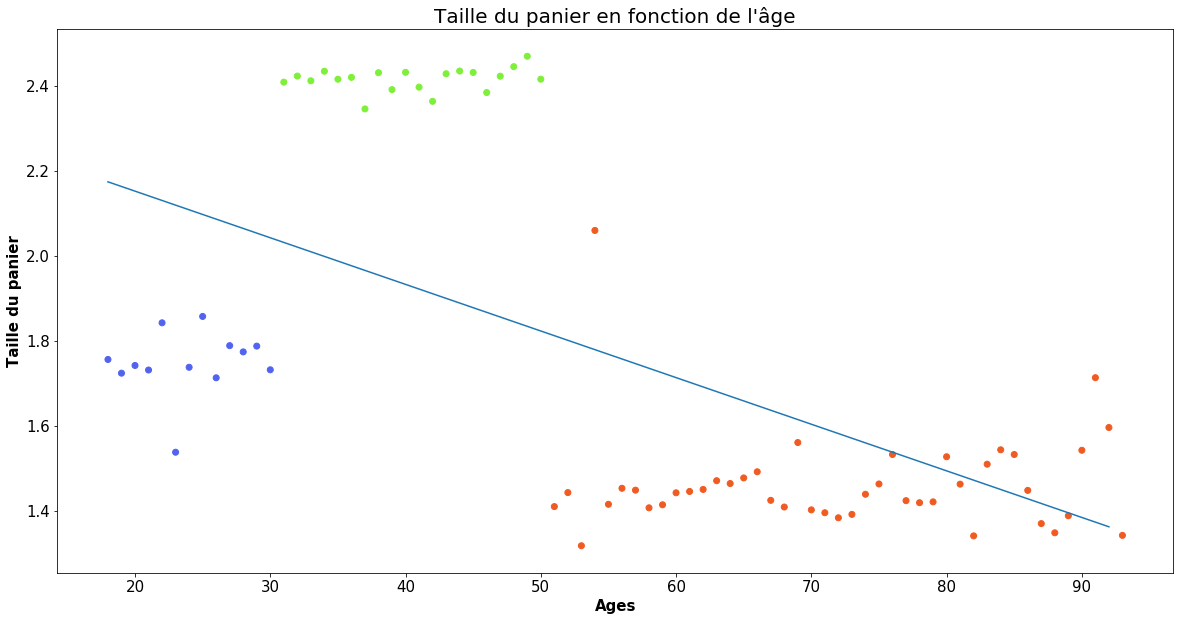

In [97]:
Yatp = agesTaillesPanier['taille_du_panier']
Xatp = agesTaillesPanier[['age']]
Xatp = sm.add_constant(Xatp)
moindreCareAtp = sm.OLS(Yatp, Xatp).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = moindreCareAtp.params['age'],moindreCareAtp.params['const']

print(moindreCareAtp.params)

fig = plt.figure(1, figsize=(20, 10))
fig = plt.figure(1, figsize=(20, 10))
def pltcolor2(lst):
    cols=[]
    for i in lst:
        if i <= 30:
            cols.append("#5163F0")
        elif 50 >= i >= 31:
            cols.append("#7EF039")
        else:
            cols.append('#F05B22')
    return cols
# Create the colors list using the function above
cols2=pltcolor2(agesFq.age)

plt.scatter(agesTaillesPanier["age"],agesTaillesPanier["taille_du_panier"], c= cols2,  marker = "o")
axes= plt.gca()
plt.plot(np.arange(18,93),[a*x+b for x in np.arange(18,93)])
plt.xlabel("Ages",fontsize =15, fontweight = 'heavy')
plt.ylabel("Taille du panier", fontsize= 15, fontweight = 'heavy' )
plt.title("Taille du panier en fonction de l'âge", fontsize = 20 )
axes.yaxis.set_tick_params (labelsize =15)
axes.xaxis.set_tick_params (labelsize =15)
plt.show()

In [40]:
print (agesTaillesPanier[agesTaillesPanier["age"]<=30].mean())
print (agesTaillesPanier[(agesTaillesPanier["age"]>=31) &(agesTaillesPanier["age"]<=50)].mean())
print (agesTaillesPanier[agesTaillesPanier["age"]>=51].mean())

age                 24.000000
taille_du_panier     1.748943
dtype: float64
age                 40.500000
taille_du_panier     2.415306
dtype: float64
age                 72.000000
taille_du_panier     1.465141
dtype: float64


#### Corré age/caté

In [41]:
ageCateg = ventesClientsProduits[['age','categ']]
ageCateg 

,age,categ
0,45,0
1,41,0
2,37,0
3,33,0
4,42,0
...,...,...
336811,35,0
336812,33,0
336813,30,2
336814,29,2


Text(0.5, 1.0, "Catégories achetés en fonction de l'âge ")

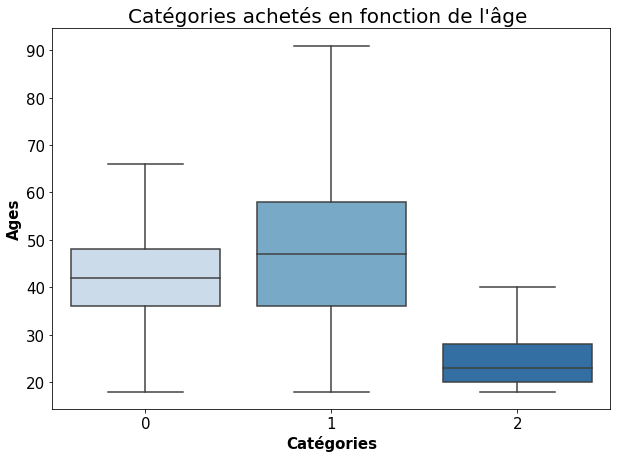

In [99]:
plt.figure(figsize=(10,7))
axes = plt.gca()
sns.boxplot( x= ageCateg["categ"], y = ageCateg["age"],showfliers = False, palette ='Blues')
plt.xlabel('Catégories', fontsize = 15,fontweight = 'heavy')
plt.ylabel('Ages', fontsize = 15,fontweight = 'heavy')
axes.yaxis.set_tick_params (labelsize =15)
axes.xaxis.set_tick_params (labelsize =15)
plt.title("Catégories achetés en fonction de l'âge ", fontsize = 20)

In [43]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(ageCateg["age"],ageCateg["categ"])

0.28116319805383183

# Supplémentaire pour étayer la présentation

### Evolution du chiffre d'affaire

In [44]:
datesPrice = ventesClientsProduits[['dates','price']]
datesPrice = datesPrice.set_index('dates')
evoCaMois = datesPrice.groupby(pd.Grouper(freq='M')).sum()
evoCaMois = evoCaMois.reset_index()
evoCaMois = evoCaMois.sort_values('dates')
evoCaMois['dates'] = evoCaMois['dates'].dt.strftime('%Y-%m')
evoCaMois = evoCaMois.set_index('dates')
evoCaMois.columns = ['chiffre_affaire']
evoCaMois['croissance']= evoCaMois.chiffre_affaire.pct_change().mul(100).round(1).map(lambda x: '{0:g}%'.format(x) if x==x else x)
evoCaMois = evoCaMois.fillna(0)

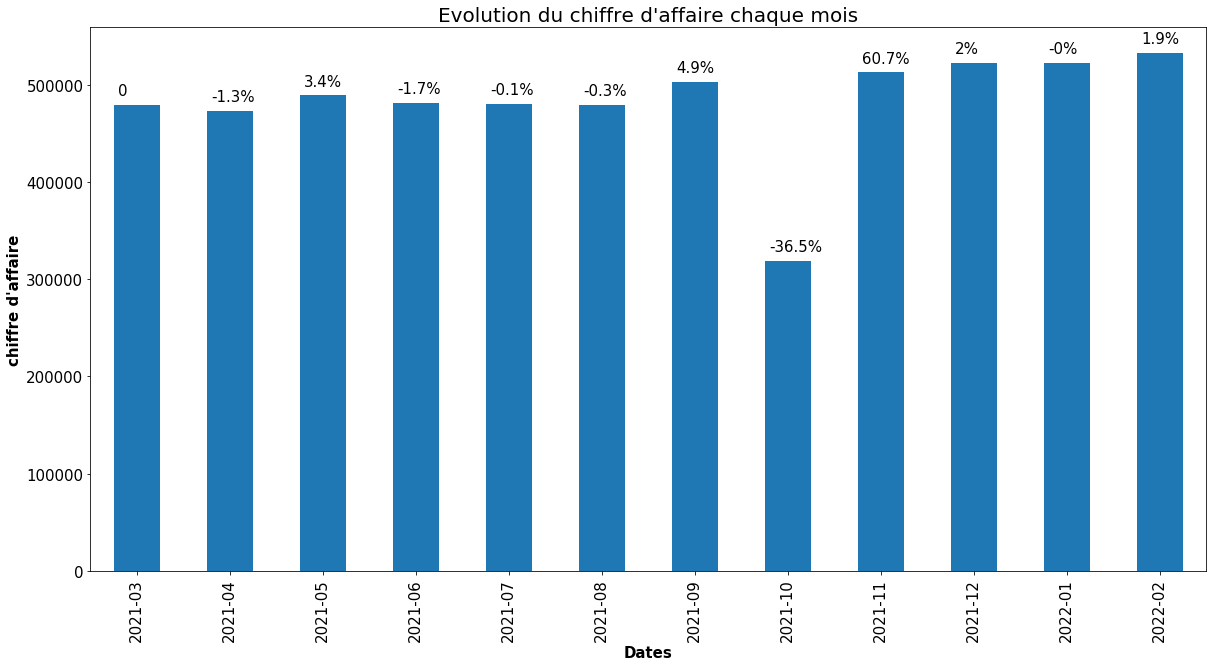

In [91]:
evoCaMois["chiffre_affaire"].plot(kind = 'bar',figsize=(20,10))
axes= plt.gca()
plt.xlabel('Dates', fontsize=15, fontweight = "heavy")
plt.ylabel("chiffre d'affaire", fontsize=15, fontweight = "heavy")
axes.yaxis.set_tick_params (labelsize =15)
axes.xaxis.set_tick_params (labelsize =15)
plt.title("Evolution du chiffre d'affaire chaque mois", fontsize=20)
label = evoCaMois['croissance']
xAudessus =[0,1,2,3,4,5,6,7,8,9,10,11]
yAudessus = evoCaMois['chiffre_affaire']
for i in range(len(evoCaMois)):
    plt.text(x = xAudessus[i]-0.2, y = yAudessus[i]+10000, s = label[i], size = 15)

### CA classe d'âge / an 

In [57]:
caClassAge = ventesClientsProduits[["classe_age","price"]]
caClassAge = caClassAge.groupby('classe_age').sum()
caClassAge["pourcentage"]= caClassAge.price /caClassAge.price.sum()*100
caClassAge

,price,pourcentage
classe_age,,
20 et moins,3.838494e+05,6.620620
20-29,1.098616e+06,18.948885
30-39,1.261104e+06,21.751478
40-49,1.482469e+06,25.569565
50-59,8.362450e+05,14.423524
60-69,4.554845e+05,7.856180
70-79,1.835026e+05,3.165047
80 et plus,9.651576e+04,1.664700


### CA categ / an 

In [58]:
caCateg = ventesClientsProduits[["categ","price"]]
caCateg = caCateg.groupby('categ').sum()
caCateg["pourcentage"]= caCateg.price /caCateg.price.sum()*100
caCateg

,price,pourcentage
categ,,
0,2.230931e+06,38.479010
1,2.247384e+06,38.762806
2,1.319471e+06,22.758184


### Evolution CA categ sur un an 

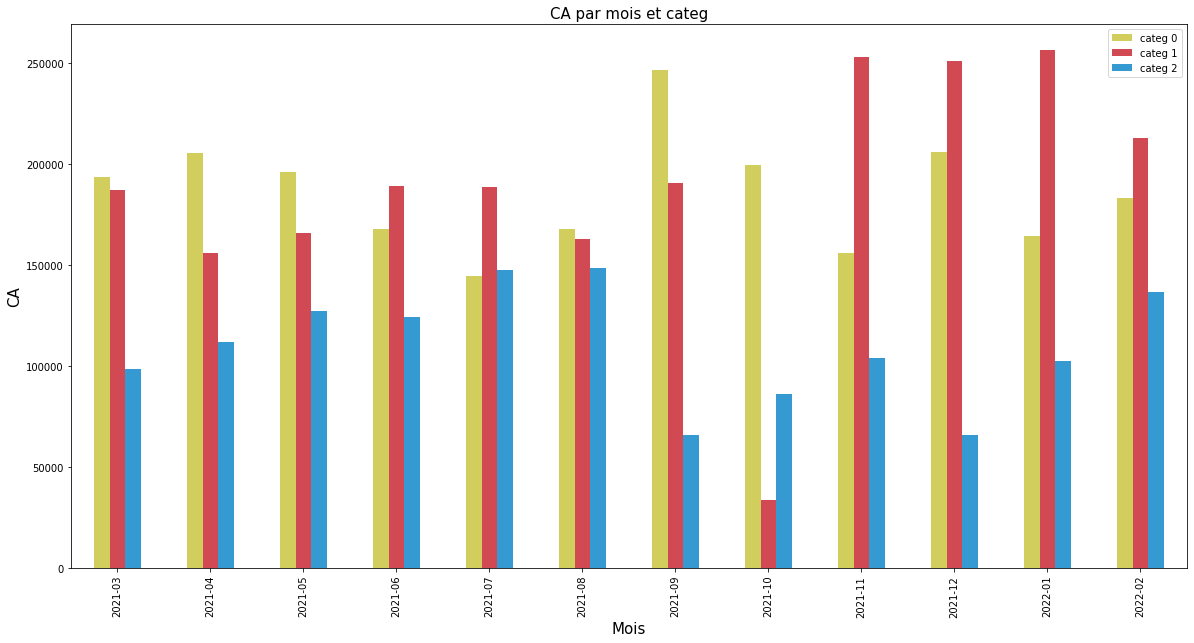

In [68]:
evoCaCateg = ventesClientsProduits[["dates","categ","price"]]
evoCaCateg = evoCaCateg.groupby([pd.Grouper(key = 'dates' , freq = 'M'),'categ']).sum()
evoCaCateg = evoCaCateg.reset_index()
evoCaCateg["dates"] = evoCaCateg['dates'].dt.strftime('%Y-%m')
evoCaCateg = evoCaCateg.set_index(["dates","categ"])
evoCaCateg
evoCaCateg.unstack(level= 1).plot(kind = 'bar', figsize = (20,10), label ='categ',
                                                    color = ('#D1CE5E',"#D14A53",'#349AD1'))
plt.xlabel('Mois', fontsize=15)
plt.ylabel('CA', fontsize=15)
plt.title("CA par mois et categ",  fontsize=15)
plt.legend(["categ 0","categ 1","categ 2"])